In [1]:
import networkx as nx
import numpy as np
from sklearn.neighbors import KernelDensity
from scipy.special import gamma as gamma_function
import scipy.stats as st
from sklearn.mixture import GaussianMixture
import pandas as pd
from face import FACE 
from rslvq import RSLVQ

In [2]:
from sklearn.datasets import load_iris
S, P = load_iris(return_X_y= True)

In [3]:
classif = RSLVQ(1)
classif.fit(S, P)

Training: 100%|██████████| 100/100 [00:01<00:00, 56.96epoch/s]


(array([[ 5.28474262,  5.32496254, -1.7378812 , -1.18049487],
        [ 9.16577199,  3.36786074,  2.16543365, -2.92423197],
        [ 5.3695404 ,  0.99435988,  9.14791484,  4.87022188]]),
 array([0, 1, 2]))

In [4]:
explainer = FACE(3.5, 0.1,classif, 3,classification_threshold=0.31,  density_estimator='KDE', kde_bandwidth=0.2 )

In [5]:
explainer.fit(S, P)
# c = explainer.create_path_to_counterfactual_class(S[0], 2)


In [6]:
c,I,p = explainer.generate_counterfactual(S[0],2)

In [11]:
explainer.recourse_paths()[0]

array([[5.1, 3.5, 1.4, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.1, 3.5, 1.4, 0.3],
       [5.1, 3.4, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [5. , 3.3, 1.4, 0.2],
       [5. , 3.2, 1.2, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5. , 3.5, 1.6, 0.6],
       [5.1, 3.7, 1.5, 0.4],
       [5.1, 3.8, 1.6, 0.2],
       [5.3, 3.7, 1.5, 0.2],
       [5.2, 3.5, 1.5, 0.2],
       [5.4, 3.7, 1.5, 0.2],
       [5.1, 3.8, 1.5, 0.3],
       [5. , 3.5, 1.3, 0.3],
       [4.9, 3.6, 1.4, 0.1],
       [4.6, 3.4, 1.4, 0.3],
       [4.4, 3.2, 1.3, 0.2],
       [4.6, 3.2, 1.4, 0.2],
       [4.8, 3. , 1.4, 0.3],
       [4.8, 3. , 1.4, 0.1],
       [4.9, 3.1, 1.5, 0.1],
       [4.9, 3. , 1.4, 0.2],
       [5. , 3. , 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5. , 3.4, 1.5, 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [5.4, 3.4, 1.7, 0.2],
       [5.5, 3.5, 1.3, 0.2],
       [5.4, 3

In [8]:
c

array([[6. , 3. , 4.8, 1.8],
       [5.9, 3. , 5.1, 1.8],
       [6.1, 3. , 4.9, 1.8],
       [6.2, 2.8, 4.8, 1.8]])

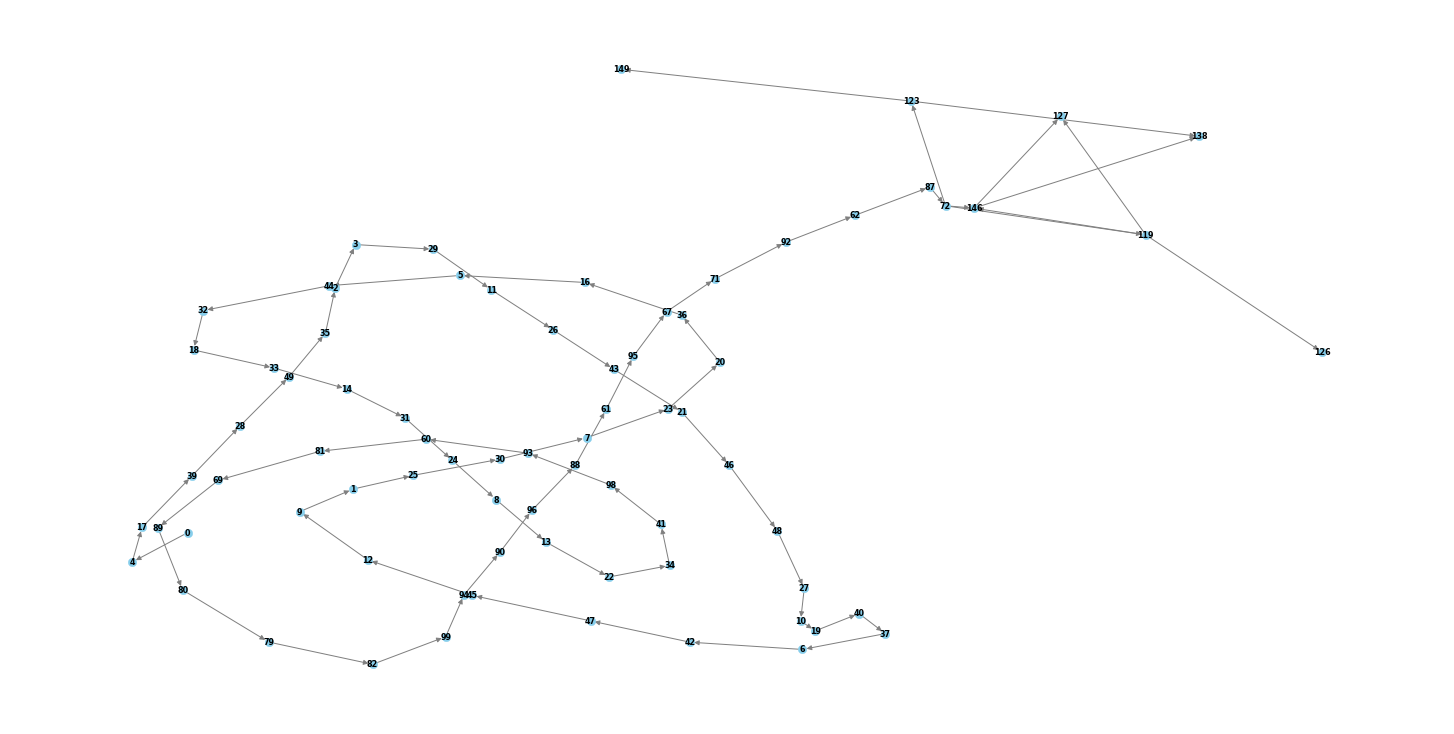

In [9]:
import networkx as nx
import matplotlib.pyplot as plt

# Define edges of the graph
edges = [(1, 2), (2, 3), (3, 1), (2, 4), (4, 5), (5, 2)]

# Create a directed graph
G = nx.DiGraph()

# Add edges to the graph
G.add_edges_from(p.edges)
plt.figure(figsize=(20,10))
# Plot the graph
nx.draw(G, with_labels=True, font_weight='bold', node_size=70, node_color='skyblue', font_color='black', font_size=8, edge_color='gray', linewidths=0.5)

# Show the plot
plt.show()

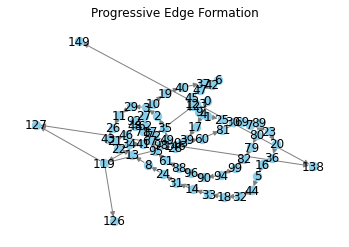

In [10]:
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
import networkx as nx
from IPython.display import HTML
import random

# Function to update the plot for each animation frame
def update(frame):
    plt.cla()  # Clear the current axis

    # Add edges progressively
    edges_to_add = edges[:frame + 1]
    G.add_edges_from(edges_to_add)

    # Draw the graph
    pos = nx.spring_layout(G)
    nx.draw(G, pos, with_labels=True, node_color='skyblue', node_size=70, edge_color='gray')

    plt.title('Progressive Edge Formation')

# Create a graph with nodes

G = nx.DiGraph()
G.add_nodes_from(p.nodes())

# Create a list of edges
edges = list(p.edges())
# Create a figure and axis
fig, ax = plt.subplots()

# Create the animation
animation = FuncAnimation(fig, update, frames=len(p.edges()), interval=1000, repeat=False)

# Display the animation in the notebook
HTML(animation.to_jshtml())
